# Pandas Tutorials
Practice using pandas techniques to process data.

## <a id="toc">Table of Contents</a>
> 1. [Access Data](#1)
    1. Excel
    
> 2. [DataFrame Validation](#2)
    1. [head()/tail()](#2a): first/last n rows
    2. [shape](#2b): number of rows and columns
    3. [info()](#2c): detailed information about the contents of the dataFrame
    4. [dtype](#2d): DataFrame data type attributes for columns
    5. [columns](#2e): returns column names as a list
    
> 3. [DataFrame Exploration](#3)
    1. **describe()**: summary statistics of numeric values
    2. **Column Slicing**: specify columns of a DataFrame
    3. **Update a value(s)**: update a value in a DataFrame
    
> 4. [Missing Values](#4)
    1. [isnull()](#4a): generates a boolean mask indicating missing values
    2. [notnull()](#4b): opposite of isnull()
    3. [Functions and Expression with Missing Values](#4c): Use basic expressions and the sum function with missing values
    4. [dropna()](#4d): filtered copy of the original DataFrame with removed missing values
    5. [fillna()](#4e): copy of the original DataFrame with missing values filled/imputed
        
> 5. [Grouping and Aggregating](#5)
    1. [test](#5a)
    2. [test](#5a)

> 6. [Datetime](#6)
    1. [pd.to_datetime](#6a) - Convert column to datetime
    2. [pd.read_csv(#5)](#6b) - convert to datetime using date_parser
    3. [day_name()](#6c) - create column with day name
    4. [min()/max()](#6d) - date values
    5. [timedelta](#6e) - days between two dates
    6. [Filtering dates](#6f) - variety of ways to filter dates
    7. [Filtering index dates](#6g) - filtering a date index


In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline


## Set options
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)

## Point to the data folder. The data folder resides in the same location as the notebook
dataPath = os.getcwd() + '\\data'

## Specify the data files
carsFile = "cars.xlsx"
timeFile = f'https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Pandas/10-Datetime-Timeseries/ETH_1h.csv'

### <a id=1> 1. Access Data </a>
[Back to contents](#toc)

In [2]:
cars = pd.read_excel(dataPath + '\\' + carsFile)

### <a id=2> 2. DataFrame Validation </a>
[Back to contents](#toc)

#### <a id=2a> a. head()/tail() </a>
[Back to contents](#toc)

In [3]:
cars.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197


In [4]:
cars.tail(1)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
427,Volvo,XC70,Wagon,Europe,All,35145,33112,2.5,5.0,208,20,27,3823,109,186


#### <a id=2b> b. shape </a>
[Back to contents](#toc)

In [5]:
cars.shape

(428, 15)

#### <a id=2c>c. info() </a>
[Back to contents](#toc)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int64  
 6   Invoice      428 non-null    int64  
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 50.3+ KB


#### <a id=2d> d. dtype </a>
[Back to contents](#toc)

In [7]:
cars.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP             int64
Invoice          int64
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

#### <a id=2e>e. columns</a>
[Back to contents](#toc)

In [8]:
cars.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [9]:
type(cars.columns)

pandas.core.indexes.base.Index

Return columns as a list

In [10]:
print(type(cars.columns.to_list()))
print(cars.columns.to_list())

<class 'list'>
['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice', 'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length']


### <a id=3> 3. DataFrame Exploration </a>
[Back to contents](#toc)

#### a. describe()

In [11]:
cars.describe()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,17642.117750,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


#### b. Column Slicing

In [12]:
cols=['Make','Model','MSRP']
cars[cols].head()

,Make,Model,MSRP
0,Acura,MDX,36945
1,Acura,RSX Type S 2dr,23820
2,Acura,TSX 4dr,26990
3,Acura,TL 4dr,33195
4,Acura,3.5 RL 4dr,43755


In [13]:
cols=['Make','Model','MSRP']
cars.loc[:5,cols]

,Make,Model,MSRP
0,Acura,MDX,36945
1,Acura,RSX Type S 2dr,23820
2,Acura,TSX 4dr,26990
3,Acura,TL 4dr,33195
4,Acura,3.5 RL 4dr,43755
5,Acura,3.5 RL w/Navigation 4dr,46100


#### c. Update a value(s)

In [14]:
## Create a test dataFrame
df1 = pd.DataFrame([['cold', 9], ['warm',4],[None, 4]],
                   columns=['Strings', 'Integers'])
df1.head()

,Strings,Integers
0,cold,9
1,warm,4
2,None,4


In [15]:
## Set the Integers value to None if it equals 9
df1.loc[df1.Integers == 9] = None 
df1.head()

,Strings,Integers
0,None,NaN
1,warm,4.0
2,None,4.0


### <a id=4> 4. Missing Values </a>
[Back to contents](#toc)

In [16]:
## Create a test DataFrame with missing values

colNames = ['Temp', 'Speed', 'Measure1', 'Measure2', 'Measure3', 'Measure4'] 

df2 = pd.DataFrame([['cold','slow',None, 2.7, 6.6, 3.1],
                    ['warm','medium', 4.2, 5.1, 7.9,9.1],
                    ['hot', 'fast', 9.4, 11.0, None, 6.8],
                    ['cool', None, None, None, 9.1, 8.9],
                    ['cool', 'medium', 6.1, 4.3, 12.2, 3.7],
                    [None, 'slow', None, 2.9, 3.3, 1.7],
                    [None, 'slow', None, 2.9, 3.3, 1.7]],
                   columns=colNames)

df2.head(10)

,Temp,Speed,Measure1,Measure2,Measure3,Measure4
0,cold,slow,NaN,2.7,6.6,3.1
1,warm,medium,4.2,5.1,7.9,9.1
2,hot,fast,9.4,11.0,NaN,6.8
3,cool,None,NaN,NaN,9.1,8.9
4,cool,medium,6.1,4.3,12.2,3.7
5,None,slow,NaN,2.9,3.3,1.7
6,None,slow,NaN,2.9,3.3,1.7


- *None* for objects
- *NaN* for floats

In [17]:
df2.dtypes

Temp         object
Speed        object
Measure1    float64
Measure2    float64
Measure3    float64
Measure4    float64
dtype: object

#### a. <a id="4a">d1. isnull()</a>
[Back to contents](#toc)

Return the boolean indicating missing values

In [18]:
df2.isnull()

,Temp,Speed,Measure1,Measure2,Measure3,Measure4
0,False,False,True,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,True,False
3,False,True,True,True,False,False
4,False,False,False,False,False,False
5,True,False,True,False,False,False
6,True,False,True,False,False,False


Return the missing count for each column.

In [19]:
df2.isnull().sum()

Temp        2
Speed       1
Measure1    4
Measure2    1
Measure3    1
Measure4    0
dtype: int64

#### b. <a id='4b'>d2. notnull()</a>
[Back to contents](#toc)

In [20]:
df2.notnull().sum()

Temp        5
Speed       6
Measure1    3
Measure2    6
Measure3    6
Measure4    7
dtype: int64

#### c. <a id='4c'>d3. Functions and Expression with Missing Values</a>
- Row-wise operations on missing data returns missing values
- Methods and functions missing values treated as 0

[Back to contents](#toc)

In [21]:
df2.head(10)

,Temp,Speed,Measure1,Measure2,Measure3,Measure4
0,cold,slow,NaN,2.7,6.6,3.1
1,warm,medium,4.2,5.1,7.9,9.1
2,hot,fast,9.4,11.0,NaN,6.8
3,cool,None,NaN,NaN,9.1,8.9
4,cool,medium,6.1,4.3,12.2,3.7
5,None,slow,NaN,2.9,3.3,1.7
6,None,slow,NaN,2.9,3.3,1.7


Add missing values using an expression

In [22]:
df2['Sum_M3_M4'] = df2['Measure3'] + df2['Measure4']
df2.head(10).loc[:,['Measure3','Measure4','Sum_M3_M4']]

,Measure3,Measure4,Sum_M3_M4
0,6.6,3.1,9.7
1,7.9,9.1,17.0
2,NaN,6.8,NaN
3,9.1,8.9,18.0
4,12.2,3.7,15.9
5,3.3,1.7,5.0
6,3.3,1.7,5.0


Add missing values using a function (across)

In [23]:
df2['Sum_M3_M4'] = df2[['Measure3','Measure4']].sum(axis=1, skipna=True)  ##Default is true, turn to false to get missing
df2.head(10).loc[:,['Measure3','Measure4','Sum_M3_M4']]

,Measure3,Measure4,Sum_M3_M4
0,6.6,3.1,9.7
1,7.9,9.1,17.0
2,NaN,6.8,6.8
3,9.1,8.9,18.0
4,12.2,3.7,15.9
5,3.3,1.7,5.0
6,3.3,1.7,5.0


Down a column

In [24]:
df2[['Measure3','Measure4']].sum(skipna=False) ## Include missings to cause a missing total

Measure3     NaN
Measure4    35.0
dtype: float64

#### d. <a id='4d'> 4.dropna() </a>

[Back to contents](#toc)

In [25]:
df2.head(10)

,Temp,Speed,Measure1,Measure2,Measure3,Measure4,Sum_M3_M4
0,cold,slow,NaN,2.7,6.6,3.1,9.7
1,warm,medium,4.2,5.1,7.9,9.1,17.0
2,hot,fast,9.4,11.0,NaN,6.8,6.8
3,cool,None,NaN,NaN,9.1,8.9,18.0
4,cool,medium,6.1,4.3,12.2,3.7,15.9
5,None,slow,NaN,2.9,3.3,1.7,5.0
6,None,slow,NaN,2.9,3.3,1.7,5.0


Drop rows with a missing value anywhere

In [26]:
df2.dropna(axis=0)  ## Axis=0 is the default

,Temp,Speed,Measure1,Measure2,Measure3,Measure4,Sum_M3_M4
1,warm,medium,4.2,5.1,7.9,9.1,17.0
4,cool,medium,6.1,4.3,12.2,3.7,15.9


Drop columns with missing values

In [27]:
df2.dropna(axis=1)

,Measure4,Sum_M3_M4
0,3.1,9.7
1,9.1,17.0
2,6.8,6.8
3,8.9,18.0
4,3.7,15.9
5,1.7,5.0
6,1.7,5.0


#### e. <a id='4e'> 5.fillna() </a>

[Back to contents](#toc)

### <a id=5> 5. Grouping and Aggregating </a>
[Back to contents](#toc)

In [28]:
cars.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197


#### a. <a id='5a'> groupby method()</a>

Create a groupby object

[Back to contents](#toc)

In [29]:
country_grp = cars.groupby(['Origin'])

#### b. <a id='5b'> get_group method()</a>

Get a specific group from the groupby object

[Back to contents](#toc)

In [78]:
country_grp.get_group('USA')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
46,Buick,Rainier,SUV,USA,All,37895,34357,4.2,6.0,275,15,21,4600,113,193
47,Buick,Rendezvous CX,SUV,USA,Front,26545,24085,3.4,6.0,185,19,26,4024,112,187
48,Buick,Century Custom 4dr,Sedan,USA,Front,22180,20351,3.1,6.0,175,20,30,3353,109,195
49,Buick,LeSabre Custom 4dr,Sedan,USA,Front,26470,24282,3.8,6.0,205,20,29,3567,112,200
50,Buick,Regal LS 4dr,Sedan,USA,Front,24895,22835,3.8,6.0,200,20,30,3461,109,196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,Saturn,lon3 4dr,Sedan,USA,Front,15825,14811,2.2,4.0,140,26,35,2692,103,185
348,Saturn,lon2 quad coupe 2dr,Sedan,USA,Front,14850,13904,2.2,4.0,140,26,35,2751,103,185
349,Saturn,lon3 quad coupe 2dr,Sedan,USA,Front,16350,15299,2.2,4.0,140,26,35,2751,103,185
350,Saturn,L300-2 4dr,Sedan,USA,Front,21410,19801,3.0,6.0,182,20,28,3197,107,190


#### c. <a id='5c'> Find the value_counts for each group</a>

[Back to contents](#toc)

In [79]:
country_grp['Type'].value_counts()

Origin  Type  
Asia    Sedan     94
        SUV       25
        Sports    17
        Wagon     11
        Truck      8
        Hybrid     3
Europe  Sedan     78
        Sports    23
        Wagon     12
        SUV       10
USA     Sedan     90
        SUV       25
        Truck     16
        Sports     9
        Wagon      7
Name: Type, dtype: int64

#### d. <a id='5d'> Find the mean of each group</a>

[Back to contents](#toc)

In [32]:
country_grp['MPG_City'].mean()

Origin
Asia      22.012658
Europe    18.731707
USA       19.074830
Name: MPG_City, dtype: float64

#### e. <a id='5e'> Find the median of each group</a>

[Back to contents](#toc)

In [80]:
country_grp['MPG_City'].median()

Origin
Asia      20.5
Europe    19.0
USA       18.0
Name: MPG_City, dtype: float64

#### f. <a id='5f'> agg() method</a>

Multiple aggregate functions by groups

[Back to contents](#toc)

In [81]:
country_grp['MPG_City'].agg(func=['median','mean'])

,median,mean
Origin,,
Asia,20.5,22.012658
Europe,19.0,18.731707
USA,18.0,19.074830


#### g. <a id='5g'> apply() method</a>

Apply a user defined function on each series in the group. Here the function will count the number of cars with 2dr in the model name column.

[Back to contents](#toc)

g1 - Creat a function and apply using the apply method

In [83]:
def funcx(df):
    doors = df.str.contains('2dr').sum()
    return doors

country_grp['Model'].apply(funcx)

Origin
Asia      28
Europe    42
USA       24
Name: Model, dtype: int64

g2 - Use a lambda function within the apply method

In [84]:
country_grp['Model'].apply(lambda x: x.str.contains('2dr').sum())

Origin
Asia      28
Europe    42
USA       24
Name: Model, dtype: int64

#### h. <a id='5h'> concat()  method</a>

Combining two separate columns analyzed by the group by method. Here find the percentage of 2dr cars in each Origin

[Back to contents](#toc)

In [88]:
## View the total number or cars in each group. Store the results
totalCount = cars['Origin'].value_counts()
totalCount

Asia      158
USA       147
Europe    123
Name: Origin, dtype: int64

In [89]:
## Find the number of 2dr cars in each group. Store the results.
doors = country_grp['Model'].apply(lambda x: x.str.contains('2dr').sum())
doors

Origin
Asia      28
Europe    42
USA       24
Name: Model, dtype: int64

In [90]:
## Combine the totalCount and doors dataframes.
concat_df = pd.concat([totalCount,doors], axis='columns', sort=False)

## Rename the columns
concat_df.rename(columns={'Origin':'TotalCars','Model':'Total2dr'}, inplace=True)

concat_df

,TotalCars,Total2dr
Asia,158,28
USA,147,24
Europe,123,42


In [91]:
## Create a new calculated column
concat_df['Pct2dr'] = concat_df['Total2dr'] / concat_df['TotalCars']
concat_df

,TotalCars,Total2dr,Pct2dr
Asia,158,28,0.177215
USA,147,24,0.163265
Europe,123,42,0.341463


### <a id=6> 6. Datetime </a>
[Back to contents](#toc)

Import and preview the data.

In [92]:
time = pd.read_csv(timeFile)

display(time.head())

display(time.shape)

display(time.dtypes)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


(23674, 7)

Date       object
Symbol     object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

#### a. <a id='6a'> pd.to_datetime()</a>

Convert the Date object column to a datetime object.

[Python format codes for datetime](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

[Back to contents](#toc)

In [93]:
time['Date'] = pd.to_datetime(time['Date'], format='%Y-%m-%d %I-%p')

In [95]:
display(time.dtypes)

time.head()

Date      datetime64[ns]
Symbol            object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


#### b. <a id='6b'> pd.read_csv(date_parser)</a>

Convert the string Date column from the csv file to a datetime object during the import.

[Back to contents](#toc)

In [97]:
import datetime

## Create a function to convert the datetime string from the csv file into a datetime object
date_parse_f = lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %I-%p')
time = pd.read_csv(timeFile, parse_dates=['Date'], date_parser=date_parse_f)

display(time.dtypes)

time.head()

Date      datetime64[ns]
Symbol            object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


#### c. <a id='6c'> day_name()</a>

Use the dt methods. Here find the day name of the datetime object

[Back to contents](#toc)

In [76]:
## Create a new column with the day name
time['DayName'] = time.Date.dt.day_name()
time.head()

,Date,Symbol,Open,High,Low,Close,Volume,DayName
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday


#### d. <a id='6d'> min()/max()</a> date values

[Back to contents](#toc)

In [48]:
## Find the miniumum date
time.Date.min()

Timestamp('2017-07-01 11:00:00')

In [49]:
## Find the maxiumum date
time.Date.max()

Timestamp('2020-03-13 20:00:00')

#### e. <a id='6e'> timedelta </a> Days between two dates

[Back to contents](#toc)

In [77]:
time.Date.max() - time.Date.min()

Timedelta('986 days 09:00:00')

#### f. <a id='6f'> Filter by dates </a>

[Back to contents](#toc)

In [51]:
# Filter for years greater than or equal to 2000
filter2020 = time.Date.dt.year >= 2020
time.loc[filter2020]

## Alternate solution. Specify the year as a string. Pandas knows you are referencing a year
# filter2020 = time.Date >= '2020'
# time.loc[filter2020]

,Date,Symbol,Open,High,Low,Close,Volume,DayName
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
1744,2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
1745,2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
1746,2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday
1747,2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40,Wednesday


In [52]:
## Filter for year 2019
filter2019 = time.Date.dt.year == 2019
time.loc[filter2019]

,Date,Symbol,Open,High,Low,Close,Volume,DayName
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [53]:
## Filter for between two dates
startDate = datetime.datetime(2019,1,1)
stopDate = datetime.datetime(2020,1,1)

filterDates = (time.Date >= startDate) & (time.Date < stopDate)

time.loc[filterDates]

,Date,Symbol,Open,High,Low,Close,Volume,DayName
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


#### g. <a id='6g'> Filtering a date index </a>

[Back to contents](#toc)

In [54]:
time.set_index('Date', inplace = True)

In [55]:
time

,Symbol,Open,High,Low,Close,Volume,DayName
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


filter for 2019

In [56]:
time.loc['2019']

,Symbol,Open,High,Low,Close,Volume,DayName
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


filter for 2019 and 2020

In [57]:
time.loc['2019':'2020']

,Symbol,Open,High,Low,Close,Volume,DayName
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


Jan 2020 to Feb 2020 inclusive

In [58]:
time.loc['2020-1':'2020-2']

,Symbol,Open,High,Low,Close,Volume,DayName
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday


mean close price of jan2020 - feb2020

In [59]:
time.loc['2020-1':'2020-2','Close'].mean()

195.16559027777814

#### h. <a id='6h'> resample() </a> - xxx

[DateOffset objects](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)

Find max value for each day

[Back to contents](#toc)

In [60]:
time.head()

,Symbol,Open,High,Low,Close,Volume,DayName
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday


In [61]:
time.loc['2020-1-1', 'High'].max()

132.68

In [62]:
time['High'].resample('D').max()

Date
2017-07-01    279.99
2017-07-02    293.73
2017-07-03    285.00
2017-07-04    282.83
2017-07-05    274.97
               ...  
2020-03-09    208.65
2020-03-10    206.28
2020-03-11    202.98
2020-03-12    195.64
2020-03-13    148.00
Freq: D, Name: High, Length: 987, dtype: float64

Confirm the resample was correct from above test where it was done for one day.

In [63]:
highs = time['High'].resample('D').max()
highs.loc['2020-01-01']

132.68

Plot the highs for each day.

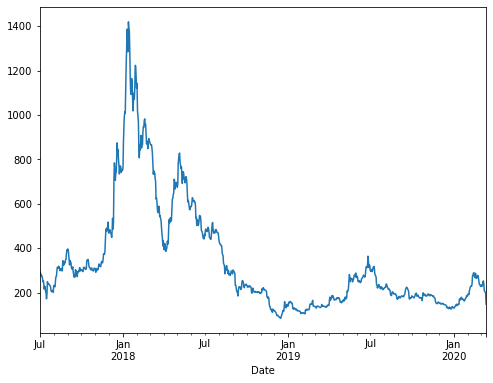

In [64]:
highs.plot(figsize=(8,6));

Resample entire dataFrame by each week. Find the mean of each column.

In [65]:
## Works with mean, but want to customize aggs
time.resample('W').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-02,268.066486,271.124595,264.819730,268.202162,2.185035e+06
2017-07-09,261.337024,262.872917,259.186190,261.062083,1.337349e+06
2017-07-16,196.193214,199.204405,192.722321,195.698393,2.986756e+06
2017-07-23,212.351429,215.779286,209.126310,212.783750,4.298593e+06
2017-07-30,203.496190,205.110357,201.714048,203.309524,1.581729e+06
...,...,...,...,...,...
2020-02-16,255.021667,257.255238,252.679762,255.198452,2.329087e+06
2020-02-23,265.220833,267.263690,262.948512,265.321905,1.826094e+06
2020-03-01,236.720536,238.697500,234.208750,236.373988,2.198762e+06


Customize aggregations for each column

In [66]:
time.resample('W').agg({'Close':'mean', 
                        'High':'max',
                        'Low':'min',
                        'Volume':'sum'})

,Close,High,Low,Volume
Date,,,,
2017-07-02,268.202162,293.73,253.23,8.084631e+07
2017-07-09,261.062083,285.00,231.25,2.246746e+08
2017-07-16,195.698393,240.33,130.26,5.017750e+08
2017-07-23,212.783750,249.40,153.25,7.221637e+08
2017-07-30,203.309524,229.99,178.03,2.657305e+08
...,...,...,...,...
2020-02-16,255.198452,290.00,216.31,3.912867e+08
2020-02-23,265.321905,287.13,242.36,3.067838e+08
2020-03-01,236.373988,278.13,209.26,3.693920e+08


### <a id=2> 7. Operations </a>
[Back to contents](#toc)

Preview the data

In [4]:
cars.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197


#### a. <a id="4a">Assign method()</a>
Manipulate a DataFrame using multiple operations. Reminds me of the DATA step. Use a lambda to work with the intermediate DataFrame (current) instead of the original. Not necessary unless you are creating new columns and using that new column.

[Back to contents](#toc)


In [17]:
carsdf =cars.assign(MPG_Avg = lambda df_new: (df_new.MPG_Highway + df_new.MPG_City)/2, 
                    Discount5 = lambda df_new: df_new.MSRP * .95)
carsdf.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,MPG_Avg,Discount5
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189,20.0,35097.75
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172,27.5,22629.00
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183,25.5,25640.50
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186,24.0,31535.25
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197,21.0,41567.25


<AxesSubplot:>

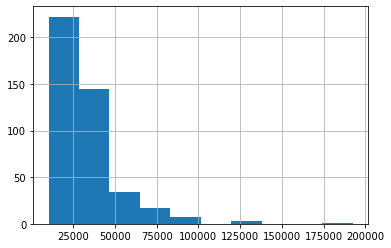

In [18]:
carsdf.MSRP.hist()

In [ ]:
cars

In [67]:
### <a id=5> 5. Data Validation </a>
[Back to contents](#toc)

SyntaxError: invalid syntax (<ipython-input-67-e109c1ae229c>, line 2)

In [ ]:
### <a id=6> 6. Data Validation </a>
[Back to contents](#toc)